## Libraries

In [122]:
!pip install --upgrade --quiet seaborn matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---



## Load evaluation results

In [124]:
results_data_no_unit_tests = pd.read_csv("data_full_docs_gen_eval_metrics_complete.csv")
fail_rates = ['unit_test_fail_rate_t5', 'unit_test_fail_rate_gemini', 'unit_test_fail_rate_gpt', 'unit_test_fail_rate_claude']
df_fail_rate = pd.read_csv('unit_test_results.csv', usecols=fail_rates)

results_data = results_data_no_unit_tests.join(df_fail_rate, how='outer')

# Rename GPT 3.5 Turbo columns to avoid splitting issues
results_data.rename(columns={
    'GPT-3.5 Turbo': 'GPT-3.5-Turbo',
    'ROUGE-1 f-score GPT-3.5 Turbo': 'ROUGE-1 f-score GPT-3.5-Turbo',
    'ROUGE-2 f-score GPT-3.5 Turbo': 'ROUGE-2 f-score GPT-3.5-Turbo',
    'ROUGE-L f-score GPT-3.5 Turbo': 'ROUGE-L f-score GPT-3.5-Turbo',
    'BLEU score GPT-3.5 Turbo': 'BLEU score GPT-3.5-Turbo',
    'Accuracy GPT-3.5 Turbo': 'Accuracy GPT-3.5-Turbo',
    'Completeness GPT-3.5 Turbo': 'Completeness GPT-3.5-Turbo',
    'Relevance GPT-3.5 Turbo': 'Relevance GPT-3.5-Turbo',
    'Understandability GPT-3.5 Turbo': 'Understandability GPT-3.5-Turbo',
    'Readability GPT-3.5 Turbo': 'Readability GPT-3.5-Turbo',
    'ruff formatting GPT-3.5 Turbo': 'Ruff formatting GPT-3.5-Turbo',
    'ruff formatting T5': 'Ruff formatting T5',
    'ruff formatting Gemini-1.0-pro': 'Ruff formatting Gemini-1.0-pro',
    'ruff formatting Claude-instant-1': 'Ruff formatting Claude-instant-1',
    'unit_test_fail_rate_t5': 'Unit test fail rate T5',
    'unit_test_fail_rate_gemini': 'Unit test fail rate Gemini-1.0-pro',
    'unit_test_fail_rate_gpt': 'Unit test fail rate GPT-3.5-Turbo',
    'unit_test_fail_rate_claude': 'Unit test fail rate Claude-instant-1'
    
}, inplace=True)
# A brief look at the data
results_data.head()

,Unnamed: 0,Function,Golden Docstring,Unit Tests,T5,Gemini-1.0-pro,GPT-3.5-Turbo,Claude-instant-1,ROUGE-1 f-score T5,ROUGE-2 f-score T5,...,Understandability Claude-instant-1,Readability Claude-instant-1,Ruff formatting T5,Ruff formatting Gemini-1.0-pro,Ruff formatting GPT-3.5-Turbo,Ruff formatting Claude-instant-1,Unit test fail rate T5,Unit test fail rate Gemini-1.0-pro,Unit test fail rate GPT-3.5-Turbo,Unit test fail rate Claude-instant-1
0,Recursion,def sum_even(lst): \r\n total = 0\r\n fo...,Recursively compute the sum of all the element...,"print(sum_even([1, [2, 3, [4, 5]]]) == 7) \np...",Return the sum of the items that are delimited...,Computes the sum of all even-indexed elements ...,\n Recursively calculate the sum of even el...,Iteratively sum the values in a list if they ...,0.235294,0.081633,...,90.0,100.0,0,0,0,0,1.000000,0.833333,0.500000,0.500000
1,NaN,"def find_num_changes(n, lst): \n if n == 0:...",Recursively compute the number of ways to repr...,"print(find_num_changes(4, [1, 2, 3]) == 4)\npr...",Find the number of changes,Recursively compute the number of possible way...,\nFind the number of ways to represent a given...,"""""""Find all possible ways to make change for ...",0.101695,0.070175,...,90.0,90.0,1,0,1,0,1.000000,0.000000,0.200000,0.200000
2,NaN,def sum_nested(lst): \n if len(lst) == 0:\n...,Recursively compute the absolute sum of all th...,"print(sum_nested([1, 2, [3, 4], [5, [6, 7], 8]...",Return the sum for nested structures .,"Recursively compute the sum of a nested list, ...",\n Recursively calculates the sum of elemen...,"""""""Iteratively compute the absolute sum of ne...",0.222222,0.000000,...,90.0,100.0,0,0,0,0,0.888889,0.666667,0.444444,0.444444
3,NaN,"def str_decomp(target, word_bank): \n if ta...",Recursively compute the number of ways to deco...,"print(str_decomp(""abcdef"", [""ab"", ""abc"", ""cd"",...",Gets the total number of words in a string .,Compute the number of ways to decompose a targ...,\n Recursively decomposes a target string b...,"""""""Iteratively decompose a target string into...",0.230769,0.080000,...,95.0,100.0,0,0,0,1,1.000000,0.000000,0.000000,0.000000
4,NaN,"def n_choose_k(n, k): \n if k < 0 or k > n:...",Compute the number of options to choose k samp...,"print(n_choose_k(8, 8) == 1)\r\nprint(n_choose...",Return the number of k - columns and k - > val...,Computes the binomial coefficient of n and k.\...,\nCalculate the number of ways to choose k ele...,Compute nCk (binomial coefficient) - the numb...,0.280000,0.125000,...,100.0,100.0,0,0,0,1,1.000000,0.000000,0.375000,0.375000




---


# **Basic Statistics**

In [125]:
# Basic statistics for each evaluation metric across all models
evaluation_metrics = [
    'ROUGE-1 f-score', 'ROUGE-2 f-score', 'ROUGE-L f-score', 'BLEU score',
    'Accuracy', 'Completeness', 'Relevance', 'Understandability', 'Readability'
]

# Initialize a dictionary to store statistics
stats_dict = {}

# Calculate statistics for each metric
for model in ['T5', 'Gemini-1.0-pro', 'GPT-3.5-Turbo', 'Claude-instant-1']:
    for metric in evaluation_metrics:
        col_name = f'{metric} {model}'
        stats_dict[col_name] = {
            'mean': results_data[col_name].mean(),
            'median': results_data[col_name].median(),
            'std_dev': results_data[col_name].std()
        }

# Convert the statistics dictionary to a DataFrame for easy viewing
stats_df = pd.DataFrame(stats_dict).T
stats_df.reset_index(inplace=True)
stats_df.columns = ['Metric_Model', 'Mean', 'Median', 'Standard Deviation']
stats_df

,Metric_Model,Mean,Median,Standard Deviation
0,ROUGE-1 f-score T5,0.172680,0.168803,0.083224
1,ROUGE-2 f-score T5,0.049926,0.041941,0.049202
2,ROUGE-L f-score T5,0.152418,0.146900,0.076744
3,BLEU score T5,0.011497,0.003109,0.020078
4,Accuracy T5,12.200000,10.000000,16.817144
5,Completeness T5,6.900000,5.000000,7.946890
6,Relevance T5,22.500000,10.000000,28.107846
7,Understandability T5,15.400000,10.000000,19.944822
8,Readability T5,29.400000,20.000000,29.444517
9,ROUGE-1 f-score Gemini-1.0-pro,0.618367,0.622524,0.125505




---


# **Overall Model Performance Comparison**

We first analyze the BLEU & ROUGE metrics which are non-LLM evaluation metrics and relatively similar.

We will use box plots for visualizations.

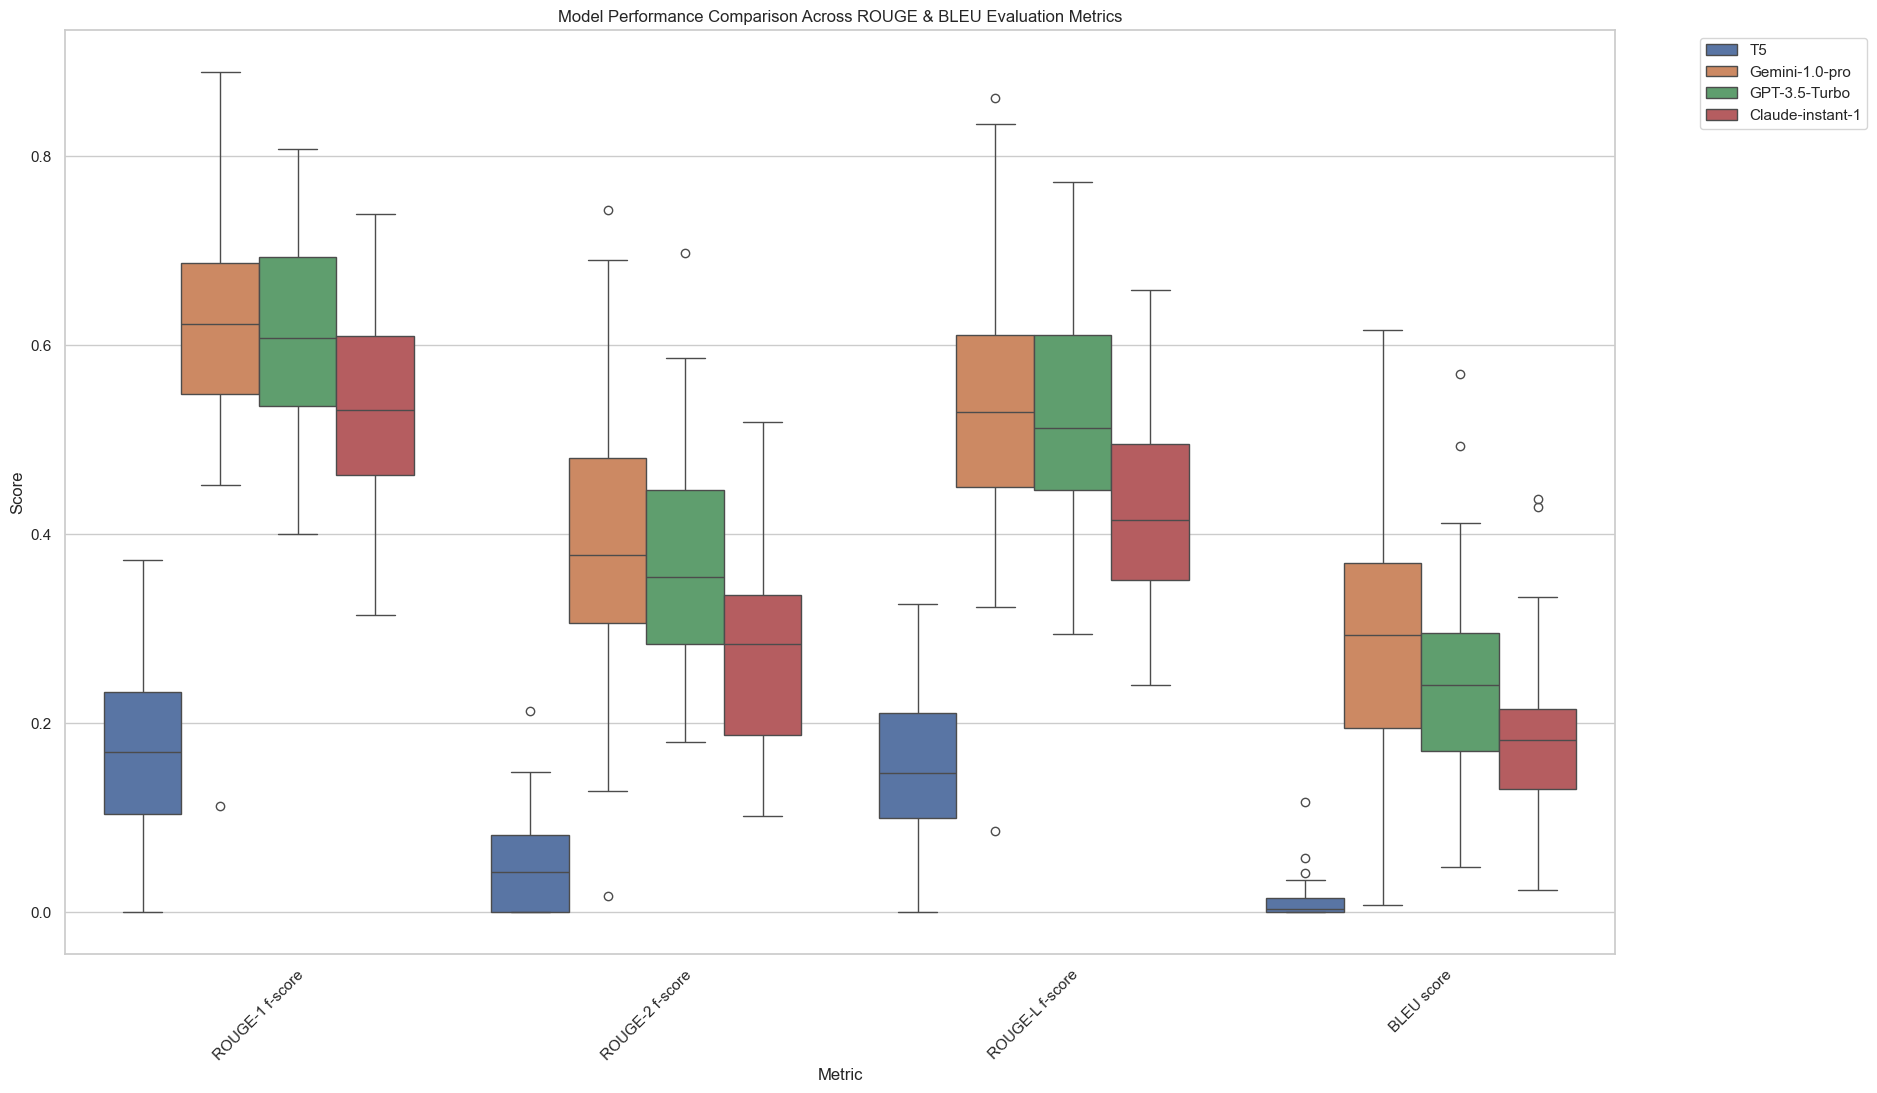

In [126]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Melt the dataframe for easier plotting with seaborn
melted_data = pd.melt(results_data, id_vars=['Function'], value_vars=[
    'ROUGE-1 f-score T5', 'ROUGE-2 f-score T5', 'ROUGE-L f-score T5', 'BLEU score T5',
    'ROUGE-1 f-score Gemini-1.0-pro', 'ROUGE-2 f-score Gemini-1.0-pro', 'ROUGE-L f-score Gemini-1.0-pro', 'BLEU score Gemini-1.0-pro',
    'ROUGE-1 f-score GPT-3.5-Turbo', 'ROUGE-2 f-score GPT-3.5-Turbo', 'ROUGE-L f-score GPT-3.5-Turbo', 'BLEU score GPT-3.5-Turbo',
    'ROUGE-1 f-score Claude-instant-1', 'ROUGE-2 f-score Claude-instant-1', 'ROUGE-L f-score Claude-instant-1', 'BLEU score Claude-instant-1'
], var_name='Metric_Model', value_name='Score')

# Split the Metric_Model column for easier plotting
melted_data[['Metric', 'Model']] = melted_data['Metric_Model'].str.rsplit(' ', n=1, expand=True)
melted_data.drop(columns=['Metric_Model'], inplace=True)

# Plot box plots for each evaluation metric across all models
plt.figure(figsize=(20, 12))
sns.boxplot(x='Metric', y='Score', hue='Model', data=melted_data)
plt.title('Model Performance Comparison Across ROUGE & BLEU Evaluation Metrics')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The box plots above show the distribution of scores for each ROUGE & BLEU metric across the different models.

Here are some observations:

ROUGE Scores:

Gemini-1.0-pro and GPT-3.5 Turbo generally perform better in terms of ROUGE-1, ROUGE-2, and ROUGE-L scores, with median values higher than those of Claude-instant-1 and significantly higher than those of T5.

T5 consistently shows the lowest ROUGE scores, indicating it performs the worst among the models for these metrics, as expected.

BLEU Scores:

Gemini-1.0-pro has the highest BLEU scores, followed by GPT-3.5 Turbo and Claude-instant-1 respectively. T5 again has the lowest scores.


---



Now we will analyze GPT4 evaluation criteria, again, using box plots


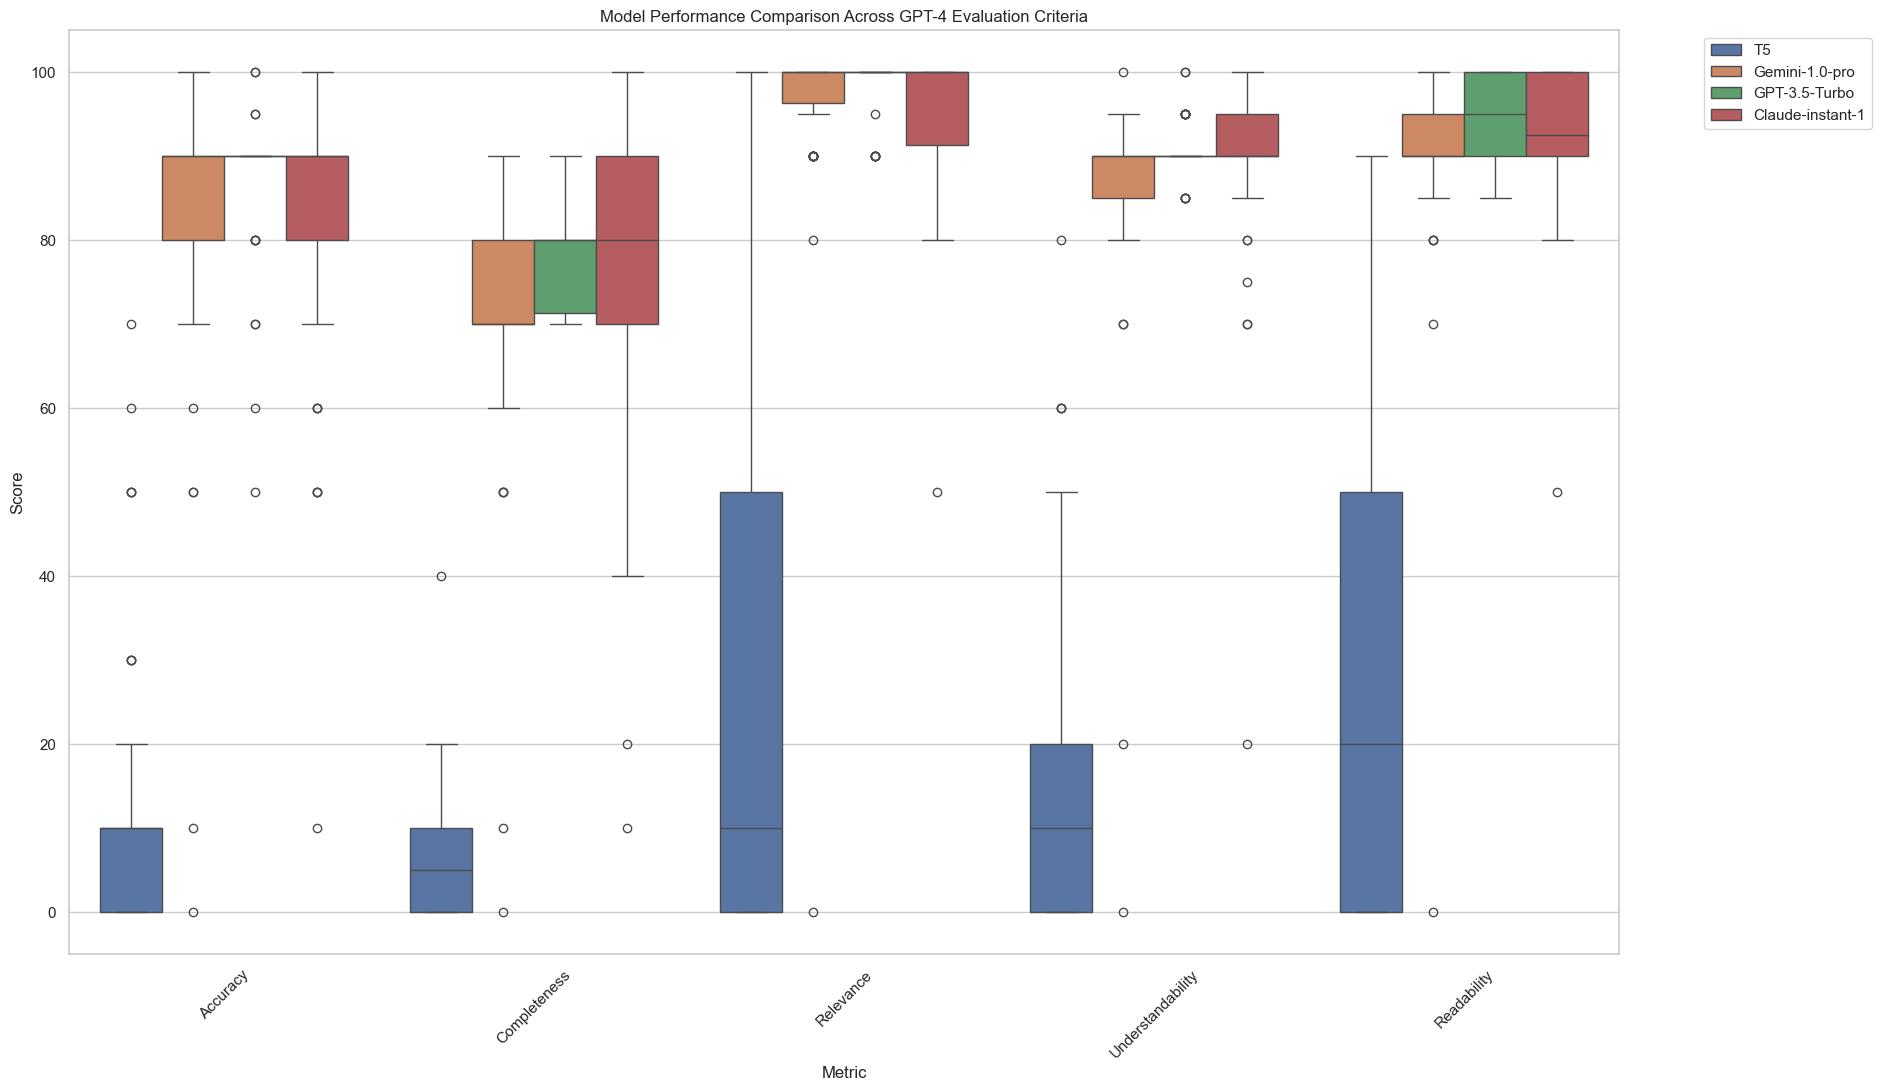

In [127]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Melt the dataframe for GPT-4 evaluation criteria
gpt4_criteria = ['Accuracy', 'Completeness', 'Relevance', 'Understandability', 'Readability']
models = ['T5', 'Gemini-1.0-pro', 'GPT-3.5-Turbo', 'Claude-instant-1']
value_vars = [f'{criteria} {model}' for criteria in gpt4_criteria for model in models]

melted_data_gpt4 = pd.melt(results_data, id_vars=['Function'], value_vars=value_vars,
                           var_name='Metric_Model', value_name='Score')

# Split the Metric_Model column for easier plotting
melted_data_gpt4[['Metric', 'Model']] = melted_data_gpt4['Metric_Model'].str.rsplit(' ', n=1, expand=True)
melted_data_gpt4.drop(columns=['Metric_Model'], inplace=True)

# Plot box plots for each GPT-4 evaluation criteria across all models
plt.figure(figsize=(20, 12))
sns.boxplot(x='Metric', y='Score', hue='Model', data=melted_data_gpt4)
plt.title('Model Performance Comparison Across GPT-4 Evaluation Criteria')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The above box plots show the distribution of scores for each GPT4 evaluation criteria across the different models.

We can see that the T5 model underperforms in comparison to all the other models.

For the other models, this evaluation metric has a significant amount of the values close to 100 which is the upper range, and also the scores variance is relatively small (especially in GPT 3.5 Turbo case), as a result the plot is not very informative.
We will drop the T5 model and try to get a better comparison between the other 3 models.


---


GPT4 evaluation criteria without T5 - for better comparison between the 3 stronger model

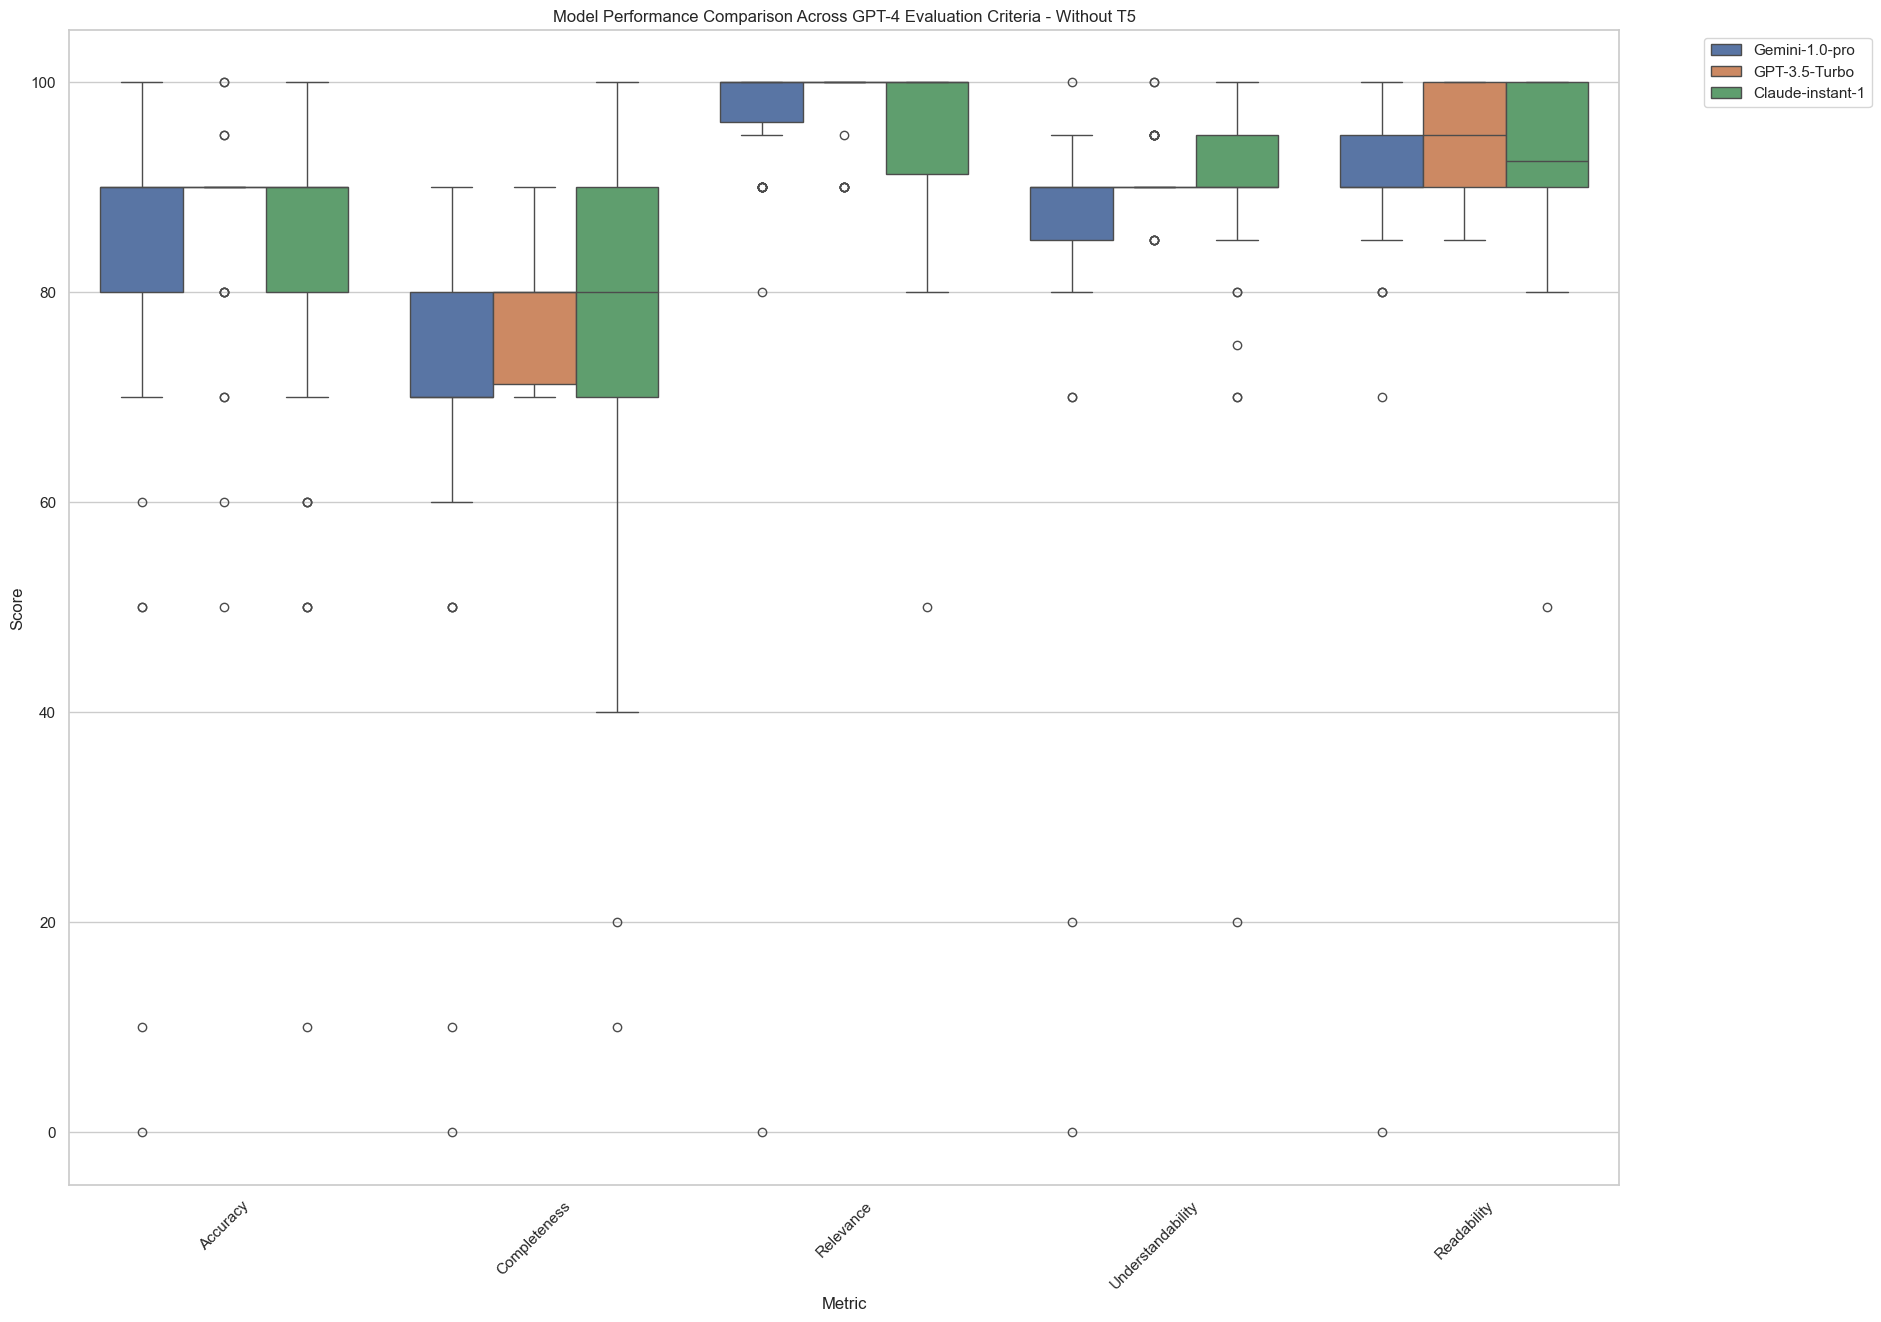

In [128]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Melt the dataframe for GPT-4 evaluation criteria
gpt4_criteria = ['Accuracy', 'Completeness', 'Relevance', 'Understandability', 'Readability']
models = ['Gemini-1.0-pro', 'GPT-3.5-Turbo', 'Claude-instant-1']
value_vars = [f'{criteria} {model}' for criteria in gpt4_criteria for model in models]

melted_data_gpt4 = pd.melt(results_data, id_vars=['Function'], value_vars=value_vars,
                           var_name='Metric_Model', value_name='Score')

# Split the Metric_Model column for easier plotting
melted_data_gpt4[['Metric', 'Model']] = melted_data_gpt4['Metric_Model'].str.rsplit(' ', n=1, expand=True)
melted_data_gpt4.drop(columns=['Metric_Model'], inplace=True)

# Plot box plots for each GPT-4 evaluation criteria across all models
plt.figure(figsize=(20, 15))
sns.boxplot(x='Metric', y='Score', hue='Model', data=melted_data_gpt4)
plt.title('Model Performance Comparison Across GPT-4 Evaluation Criteria - Without T5')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Even after trimming the T5 results, the above problems are still noticeable.
We decided to just take the mean values and compare between the models.

We will use bar plot for visualization

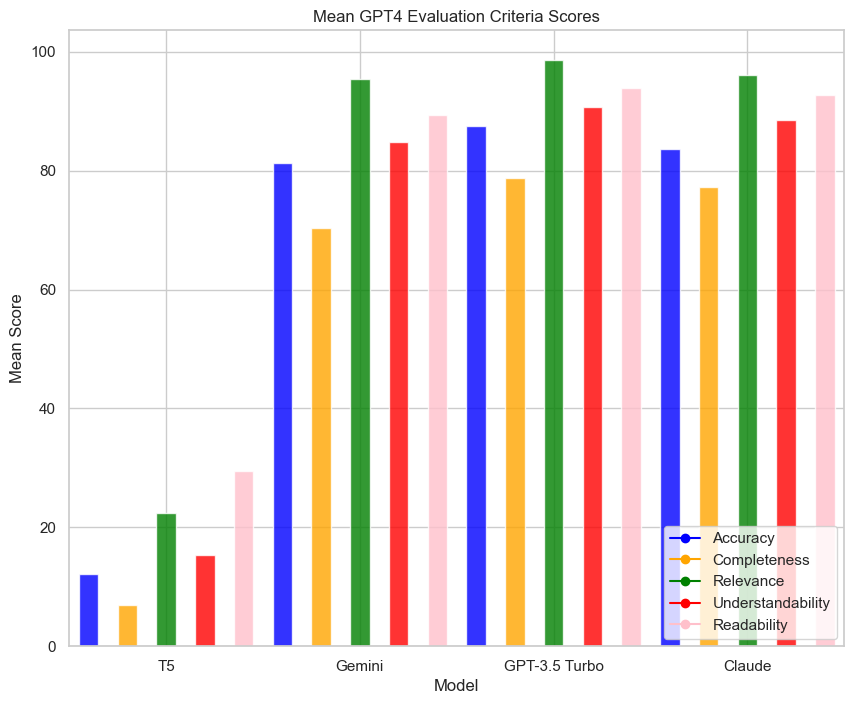

In [129]:
# Extract GPT4 evaluation criteria scores for the three models
gpt4_scores = results_data[['Accuracy T5', 'Completeness T5', 'Relevance T5', 'Understandability T5', 'Readability T5',
                    'Accuracy Gemini-1.0-pro', 'Completeness Gemini-1.0-pro', 'Relevance Gemini-1.0-pro', 'Understandability Gemini-1.0-pro', 'Readability Gemini-1.0-pro',
                    'Accuracy GPT-3.5-Turbo', 'Completeness GPT-3.5-Turbo', 'Relevance GPT-3.5-Turbo', 'Understandability GPT-3.5-Turbo', 'Readability GPT-3.5-Turbo',
                    'Accuracy Claude-instant-1', 'Completeness Claude-instant-1', 'Relevance Claude-instant-1', 'Understandability Claude-instant-1', 'Readability Claude-instant-1']]

# Calculate mean scores for each GPT4 evaluation criteria for the three models
mean_scores = gpt4_scores.mean()

# Define color palette and evaluation criteria
colors = ['blue', 'orange', 'green', 'red', 'pink']
criteria = ['Accuracy', 'Completeness', 'Relevance', 'Understandability', 'Readability']

# Plot bar plots for each GPT4 evaluation criteria
plt.figure(figsize=(10, 8))
mean_scores.plot(kind='bar', color=colors, alpha=0.8)
plt.title('Mean GPT4 Evaluation Criteria Scores')
plt.ylabel('Mean Score')
plt.xlabel('Model')
plt.xticks(rotation=0)

# Add legend for criteria and corresponding colors
legend_elements = [plt.Line2D([0], [0], color=color, label=f'{criterion}', marker='o') for criterion, color in zip(criteria, colors)]
plt.legend(handles=legend_elements, loc='lower right')

# Add model names under the corresponding bar plots
model_names = ['T5', 'Gemini', 'GPT-3.5 Turbo', 'Claude']
plt.xticks(ticks=[2, 7, 12, 17],labels=model_names)

plt.show()

The above bar plot shows again that the T5 overall performed worse than the other models.

In terms of the overall performance of the stronger 3 models, GPT 3.5 Turbo acheived the highest scores, followed by Claude-instant-1 and Gemini-1.0-pro respectively.

In terms of the different evaluation criteria, the Relevance scores were very high while the completeness scores were the lowest among all different metrics, which is reasonable considering the fact that the docstrings were generated by LLMs.


---



## **Correlation Matrix**
We will perform the same seperation between BLEU and ROUGE metrics to the GPT4 matrics.

It would be more informative to plot a correlation matrix for each model but we didn't want to overload with too many plots.

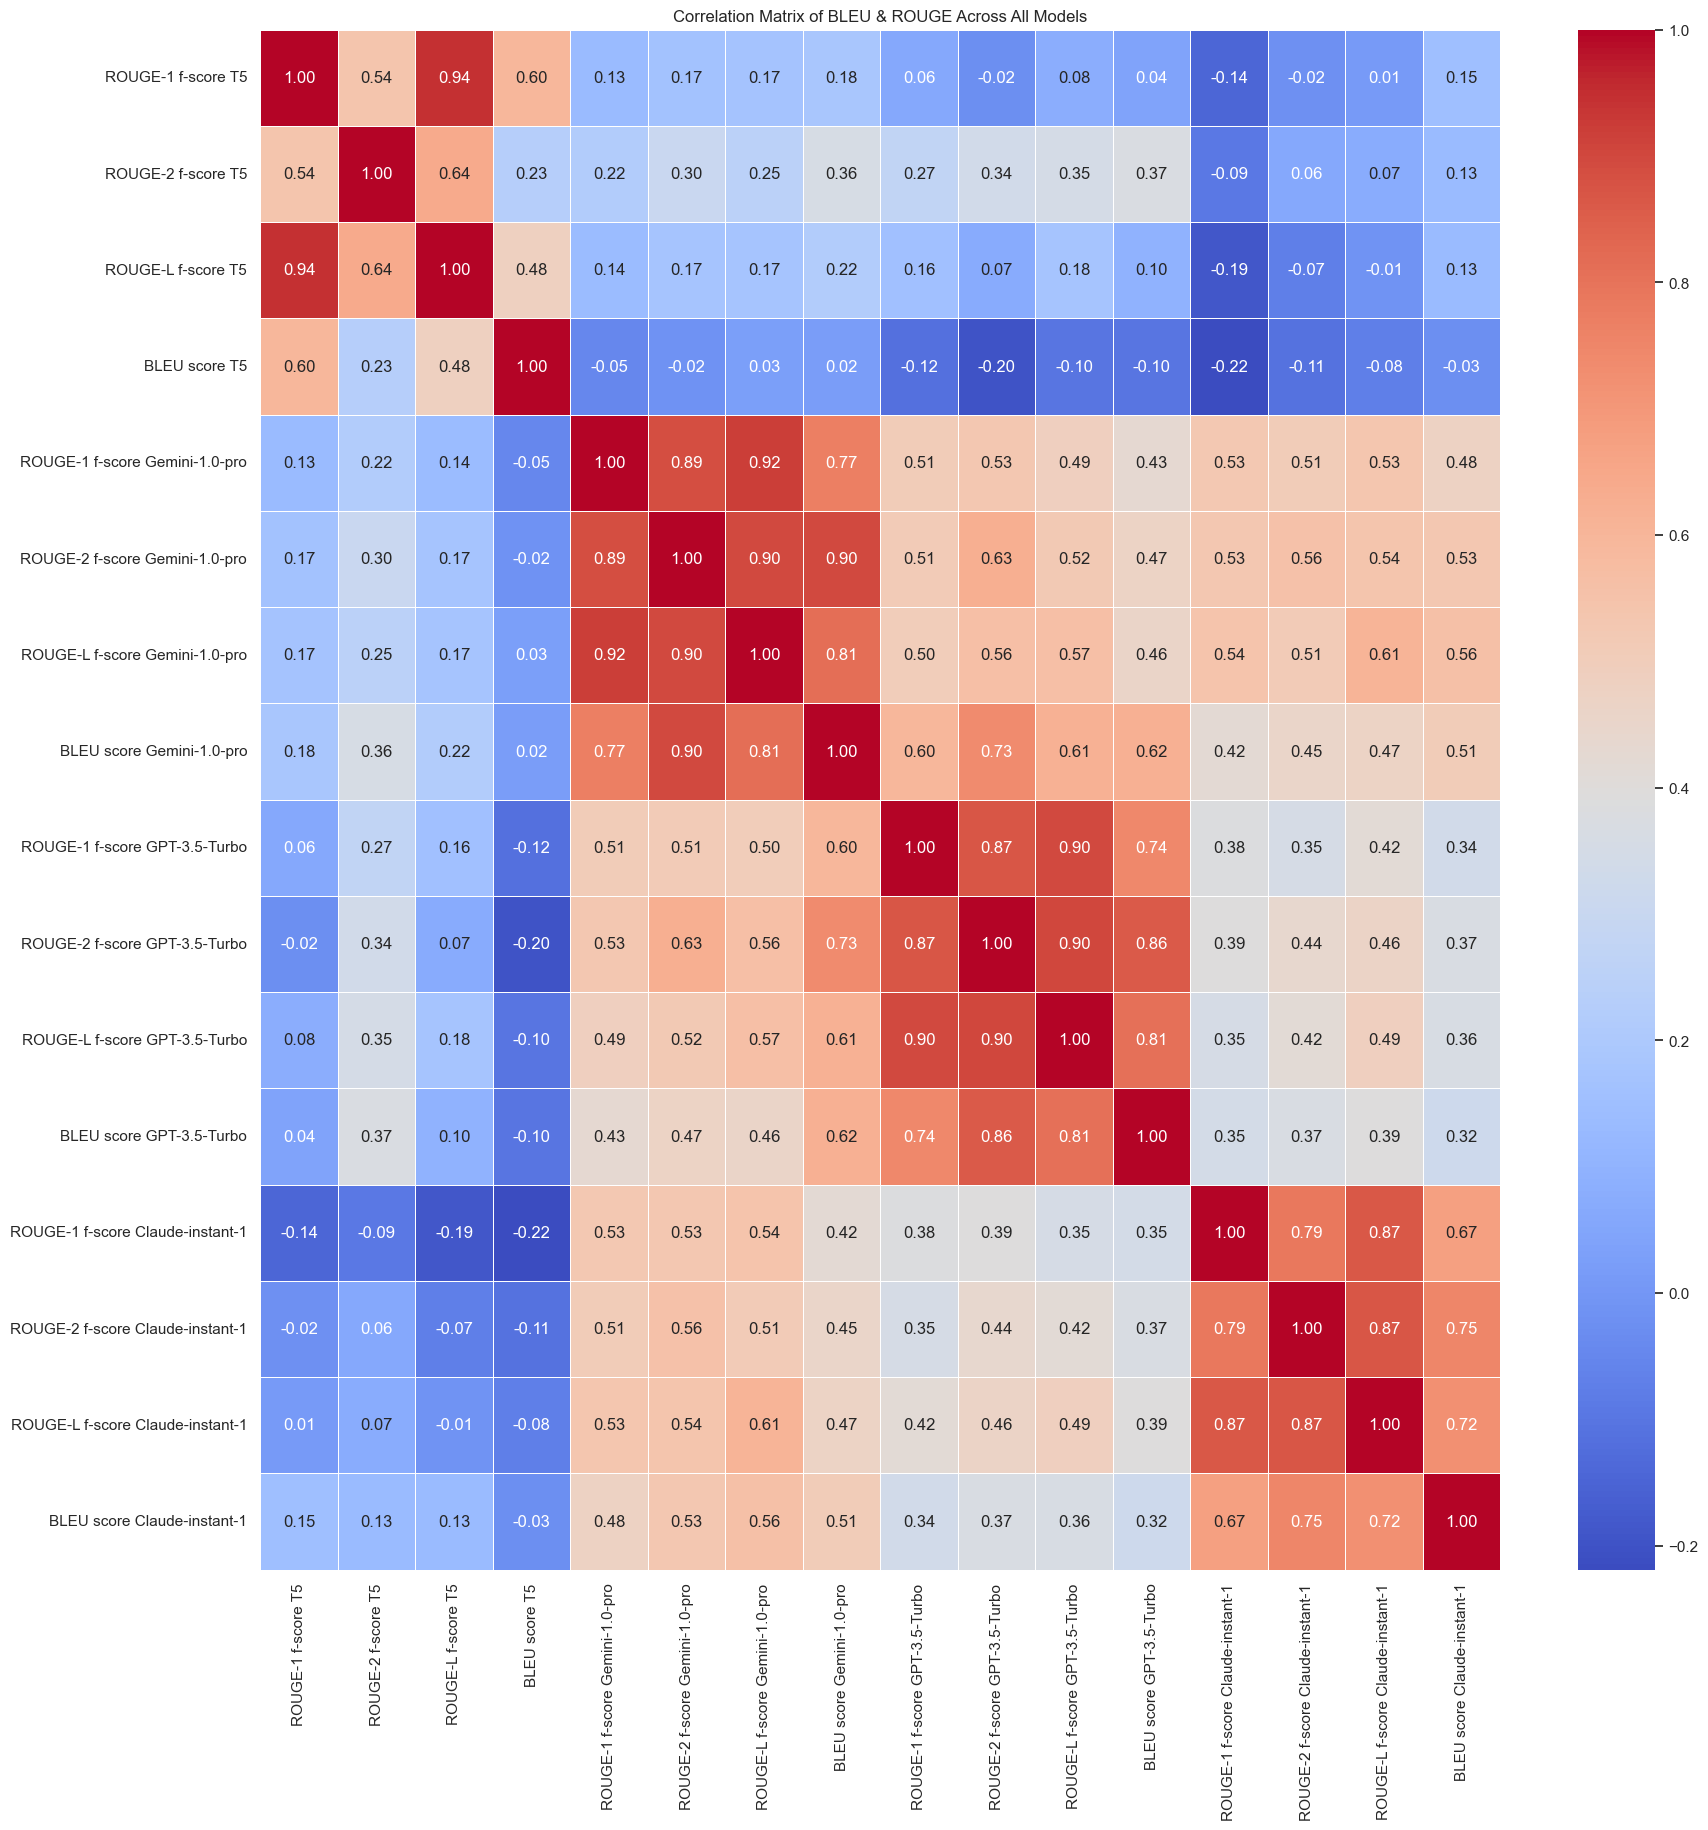

In [130]:
# Select only the relevant columns for correlation analysis
correlation_data = results_data[[
    'ROUGE-1 f-score T5', 'ROUGE-2 f-score T5', 'ROUGE-L f-score T5', 'BLEU score T5',
    'ROUGE-1 f-score Gemini-1.0-pro', 'ROUGE-2 f-score Gemini-1.0-pro', 'ROUGE-L f-score Gemini-1.0-pro', 'BLEU score Gemini-1.0-pro',
    'ROUGE-1 f-score GPT-3.5-Turbo', 'ROUGE-2 f-score GPT-3.5-Turbo', 'ROUGE-L f-score GPT-3.5-Turbo', 'BLEU score GPT-3.5-Turbo',
    'ROUGE-1 f-score Claude-instant-1', 'ROUGE-2 f-score Claude-instant-1', 'ROUGE-L f-score Claude-instant-1', 'BLEU score Claude-instant-1',
]]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of BLEU & ROUGE Across All Models')
plt.show()


As shown above, the 4X4 blocks on the diagonal show a strong correlation among the evaluation metrics for each model.

As expected the T5 scores have a very low correlation with any of the other scores acheived by the other models.


---



Correlation Matrix - GPT4 evaluation metrics

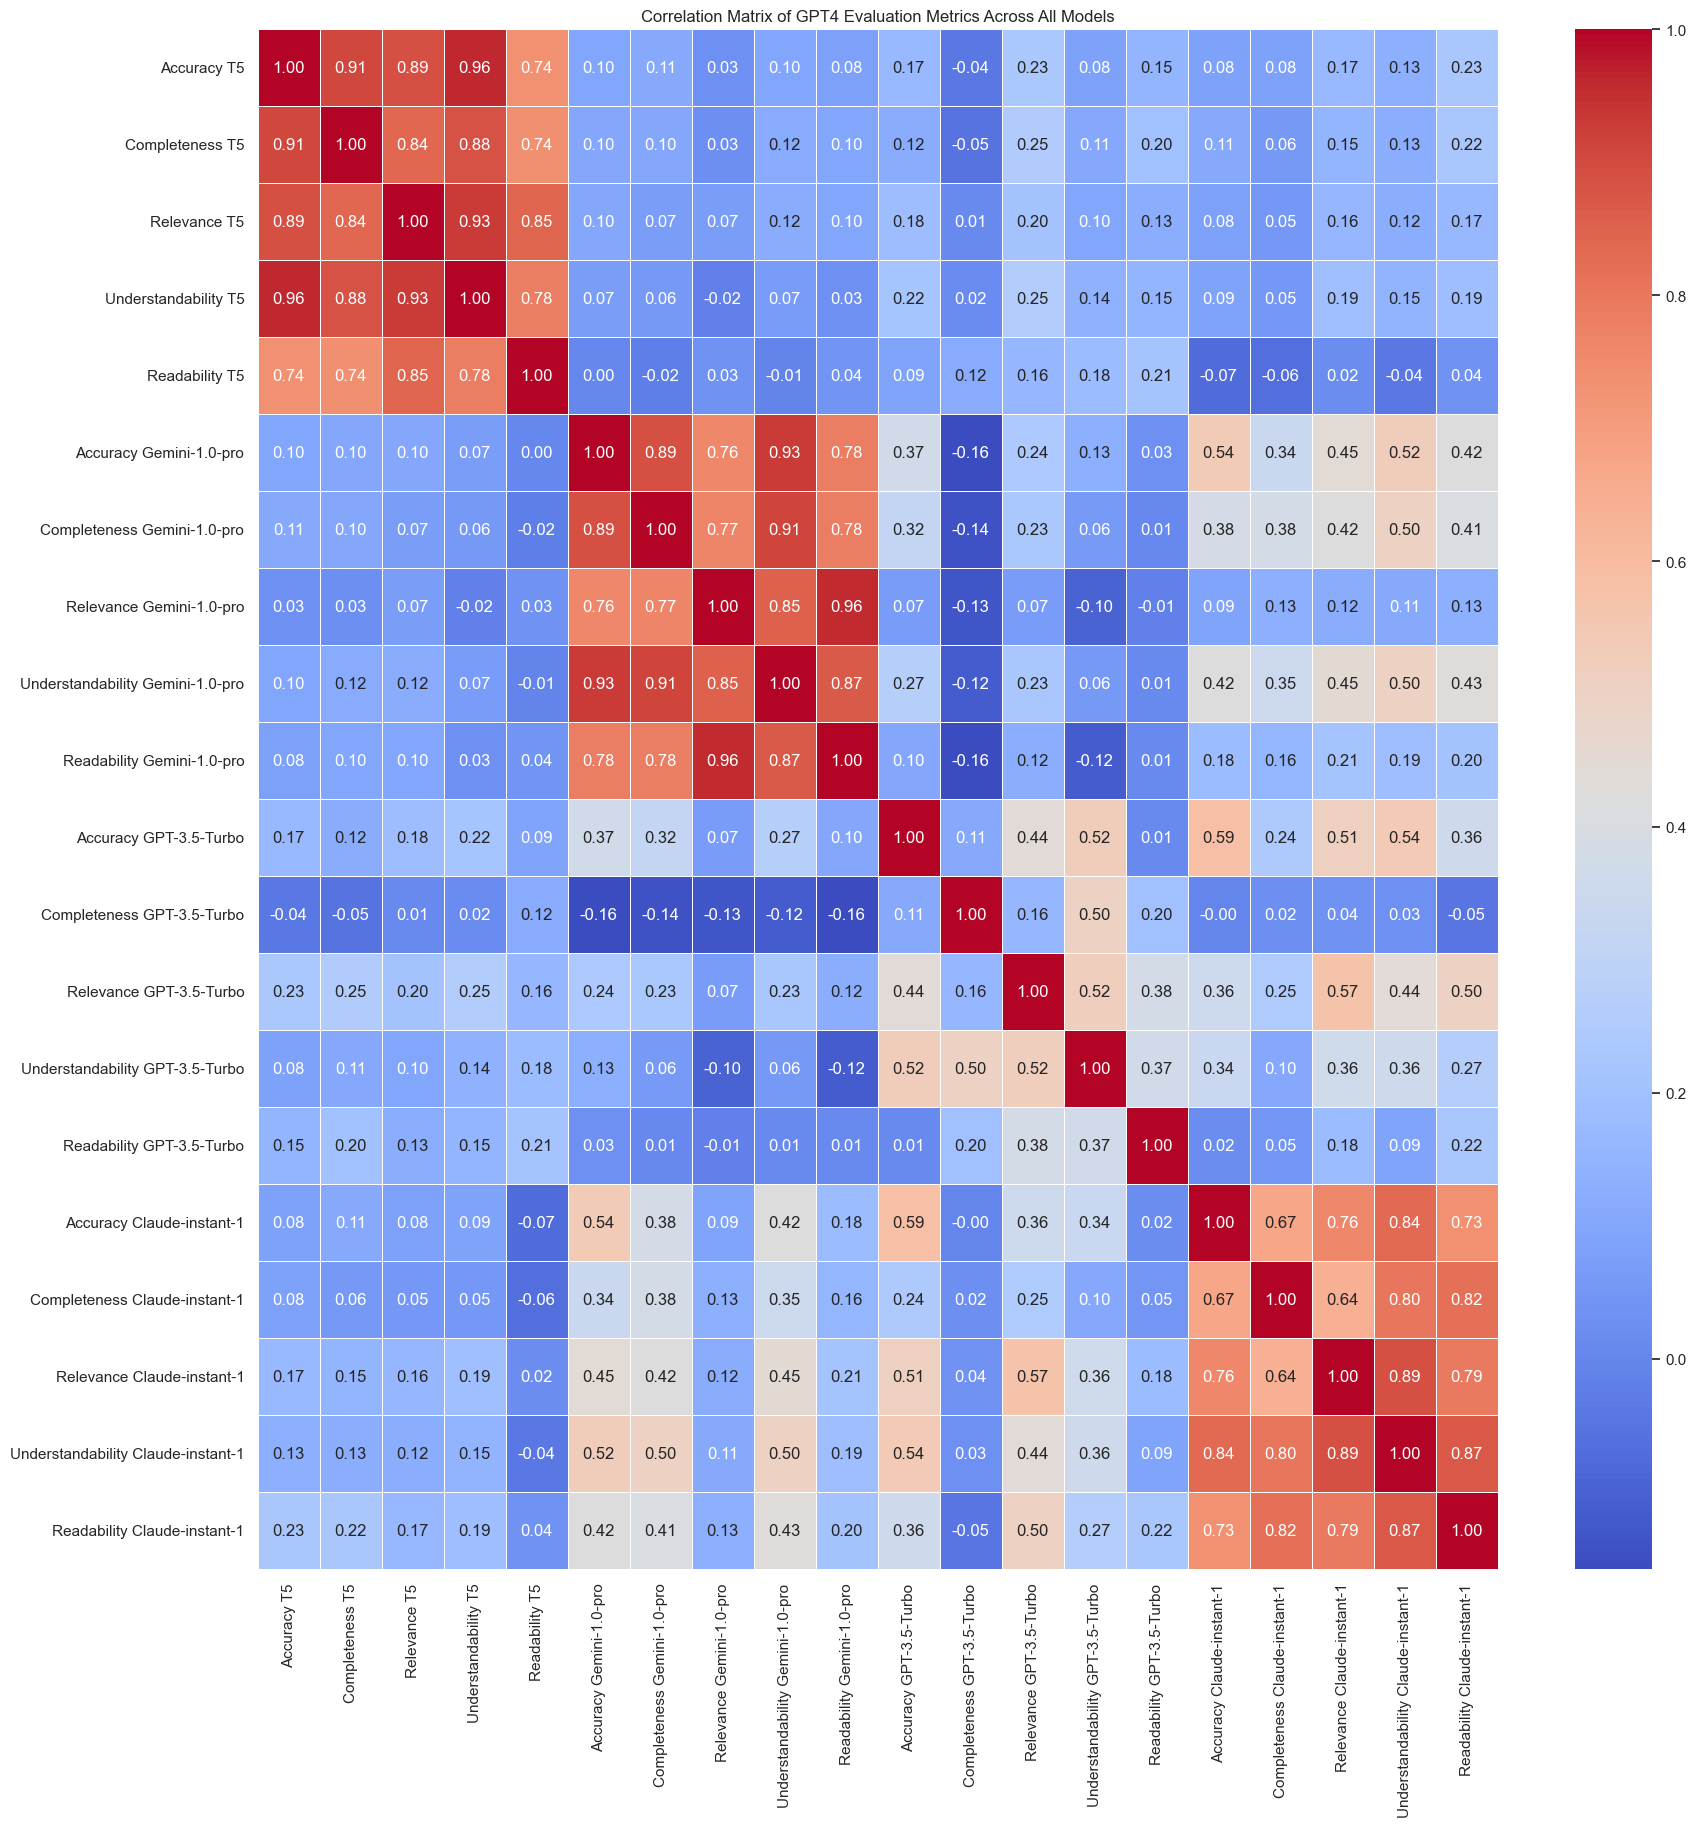

In [131]:
# Select only the relevant columns for correlation analysis
correlation_data = results_data[[
    'Accuracy T5', 'Completeness T5', 'Relevance T5', 'Understandability T5', 'Readability T5',
    'Accuracy Gemini-1.0-pro', 'Completeness Gemini-1.0-pro', 'Relevance Gemini-1.0-pro', 'Understandability Gemini-1.0-pro', 'Readability Gemini-1.0-pro',
    'Accuracy GPT-3.5-Turbo', 'Completeness GPT-3.5-Turbo', 'Relevance GPT-3.5-Turbo', 'Understandability GPT-3.5-Turbo', 'Readability GPT-3.5-Turbo',
    'Accuracy Claude-instant-1', 'Completeness Claude-instant-1', 'Relevance Claude-instant-1', 'Understandability Claude-instant-1', 'Readability Claude-instant-1'
]]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of GPT4 Evaluation Metrics Across All Models')
plt.show()


We can notice that except for the GPT model, the 5X5 blocks on the diagonal show a strong correlation among the evaluation metrics for each model. We are not sure why the GPT 3.5 Turbo scores are less correlated, it might be because they were generated by GPT4 which is a LLM trained by the same company.

Again, the T5 scores have a very low correlation with any of the other scores of the other models.


---



# **Code Types Model Performance Comparison**
We will now compare the models performance across the different code types that the models needed to generate docstrings for:


*   10 Recursion functions  
*   20 Basic functions (strings, lists, math ...)
* 5 Numpy functions
* 5 Pandas functions
* 10 Classes

For each evaluation metric we will use box plots.


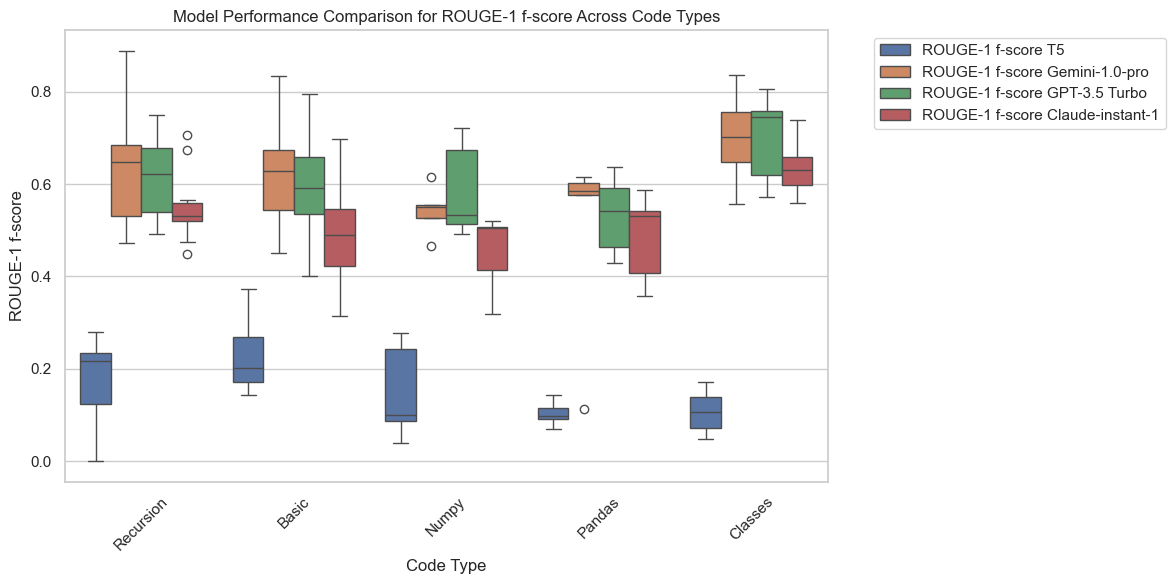

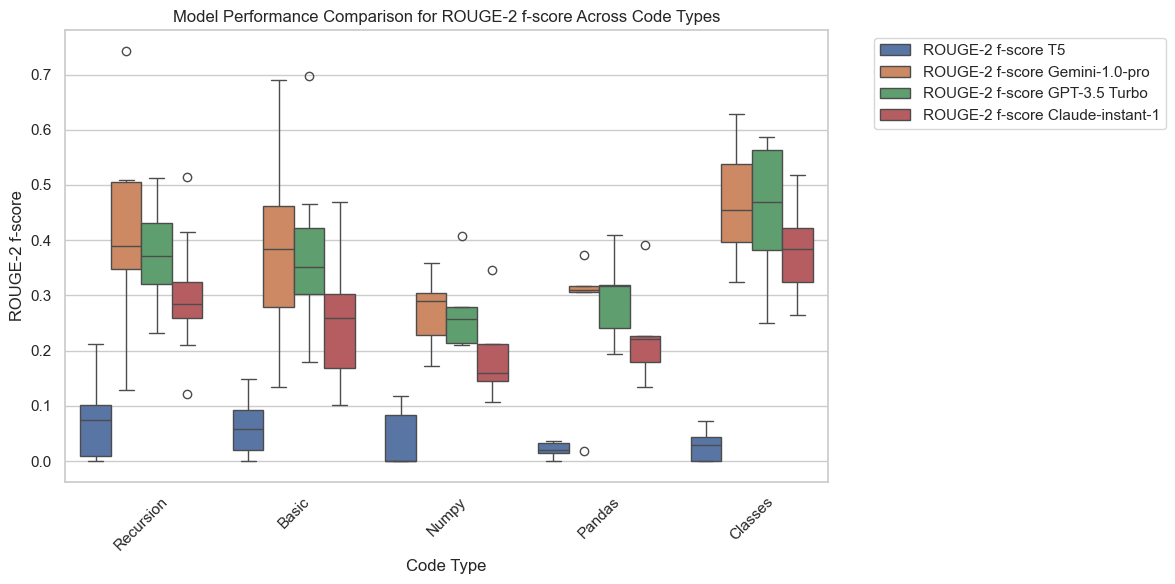

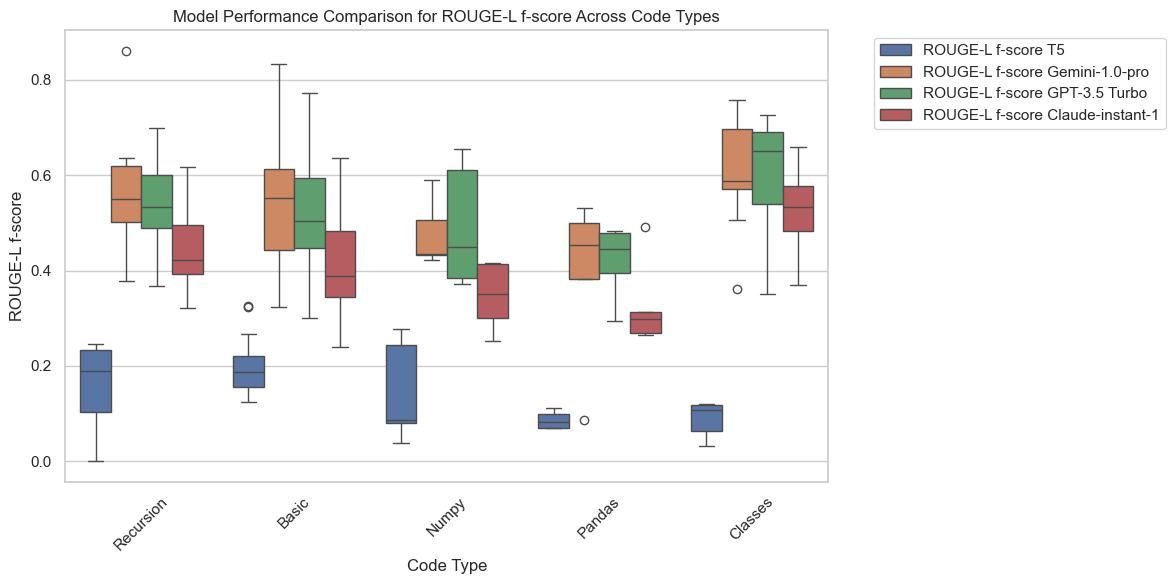

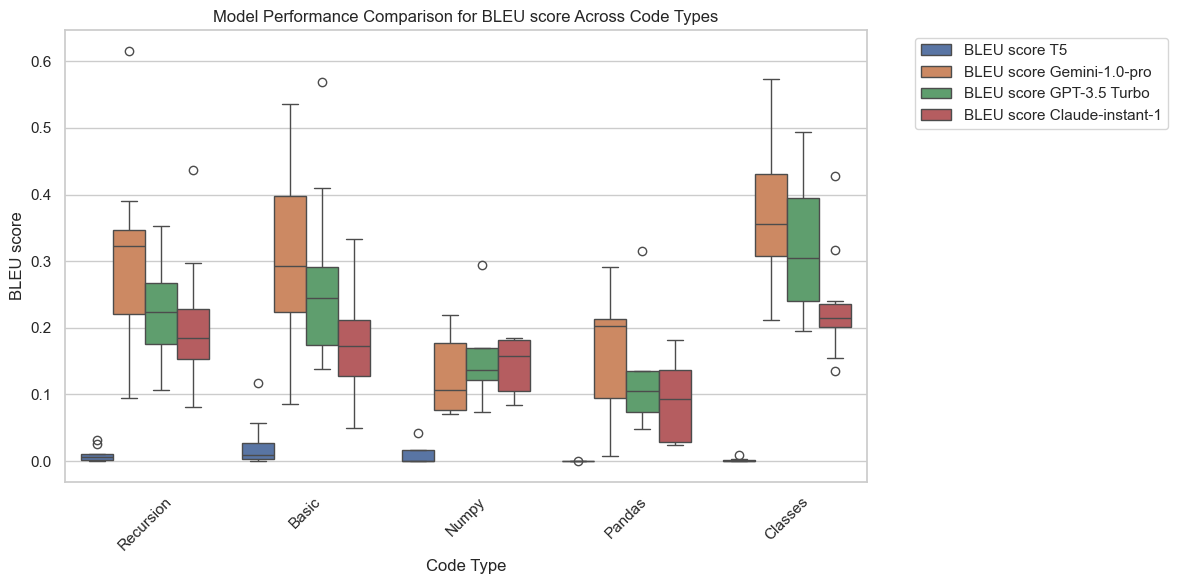

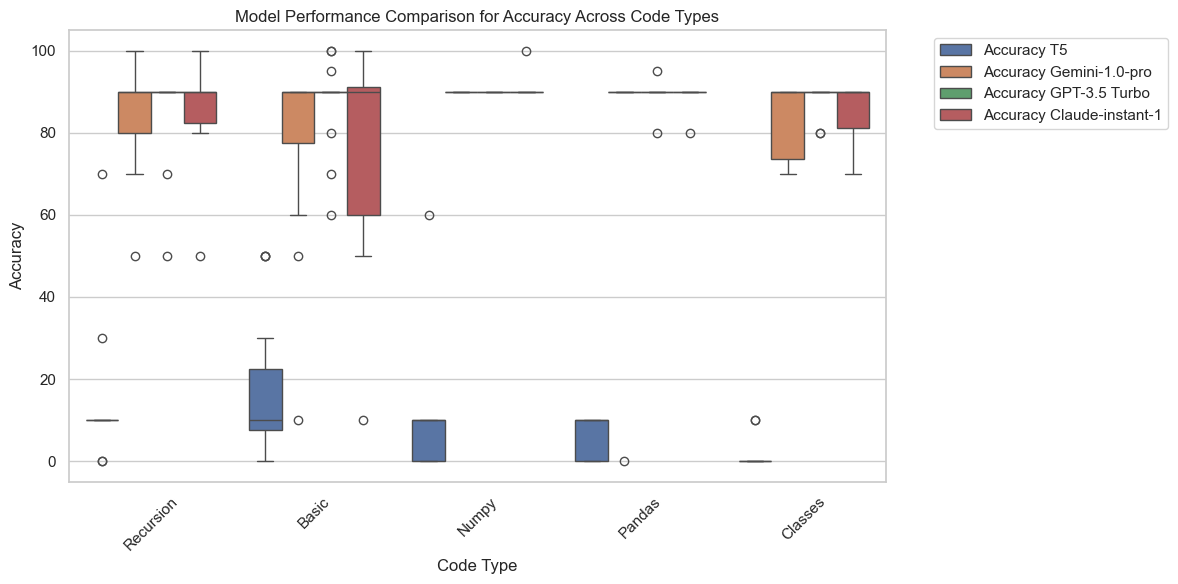

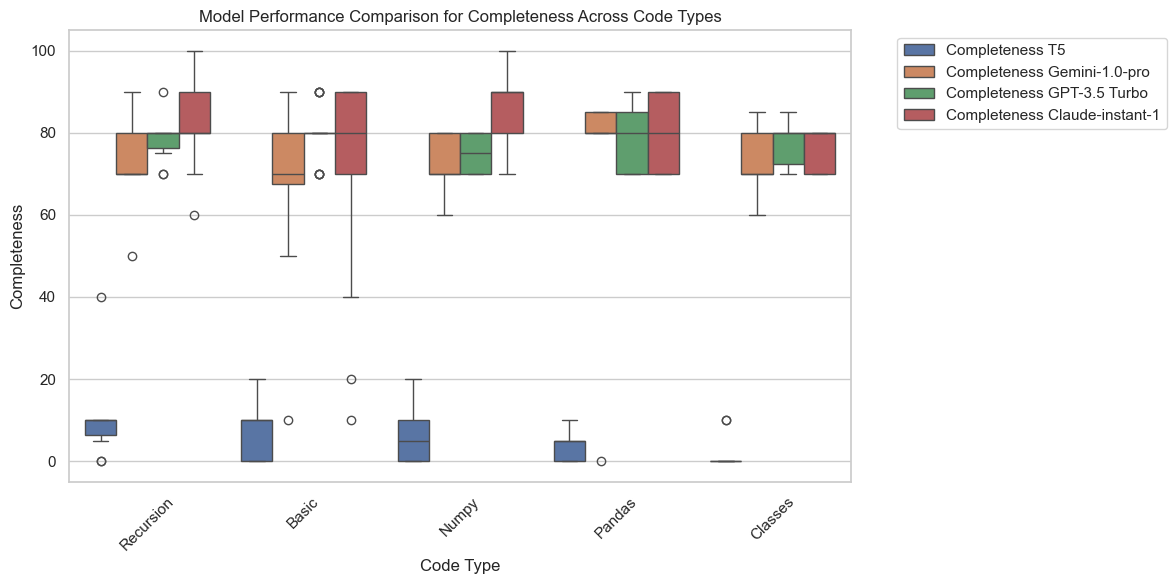

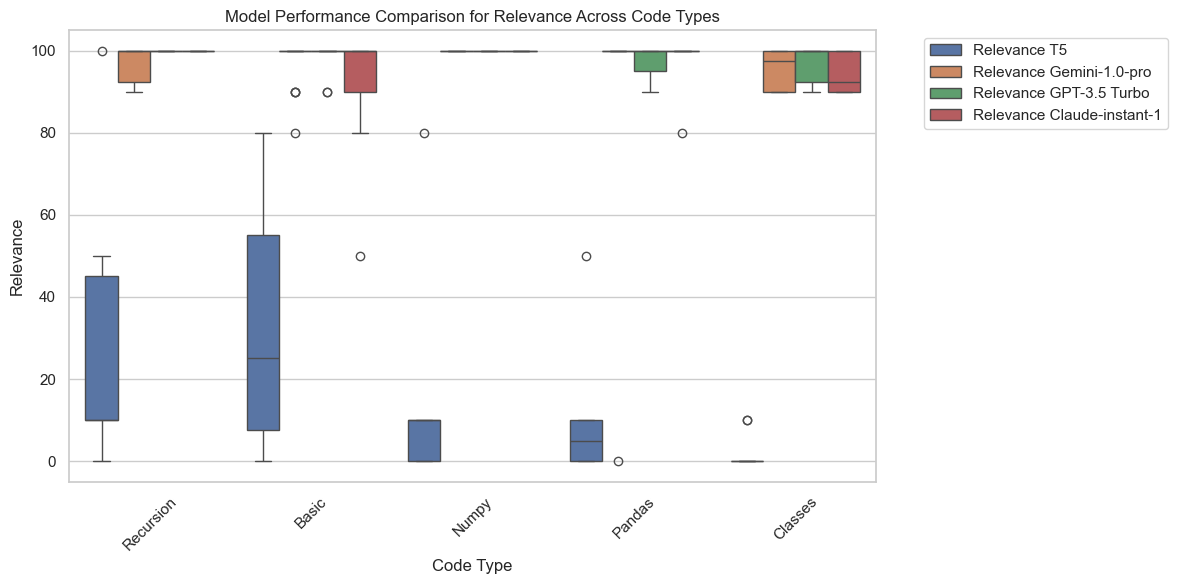

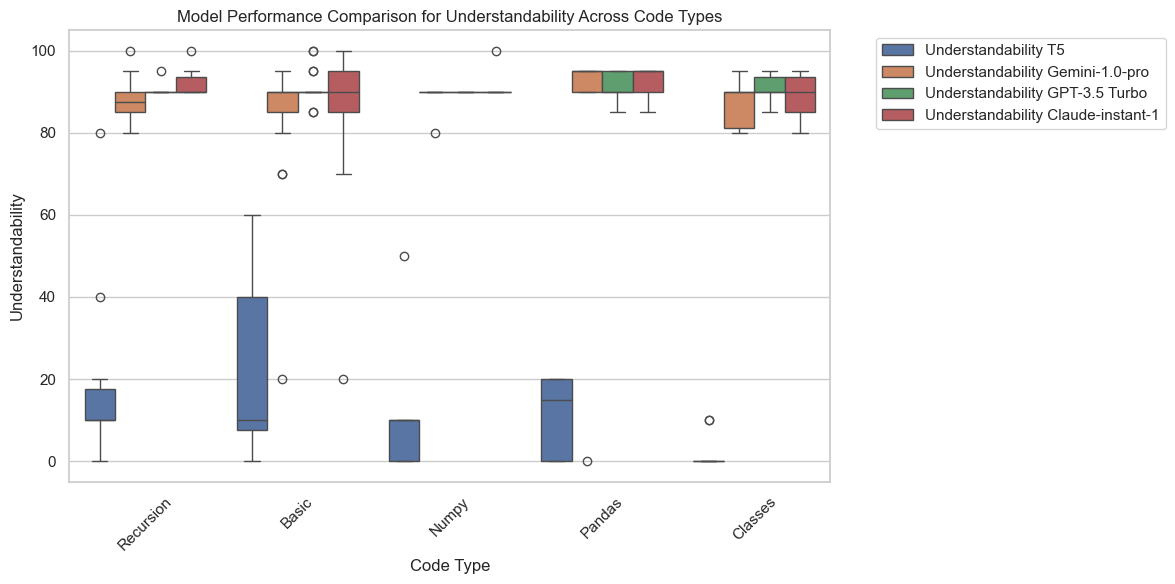

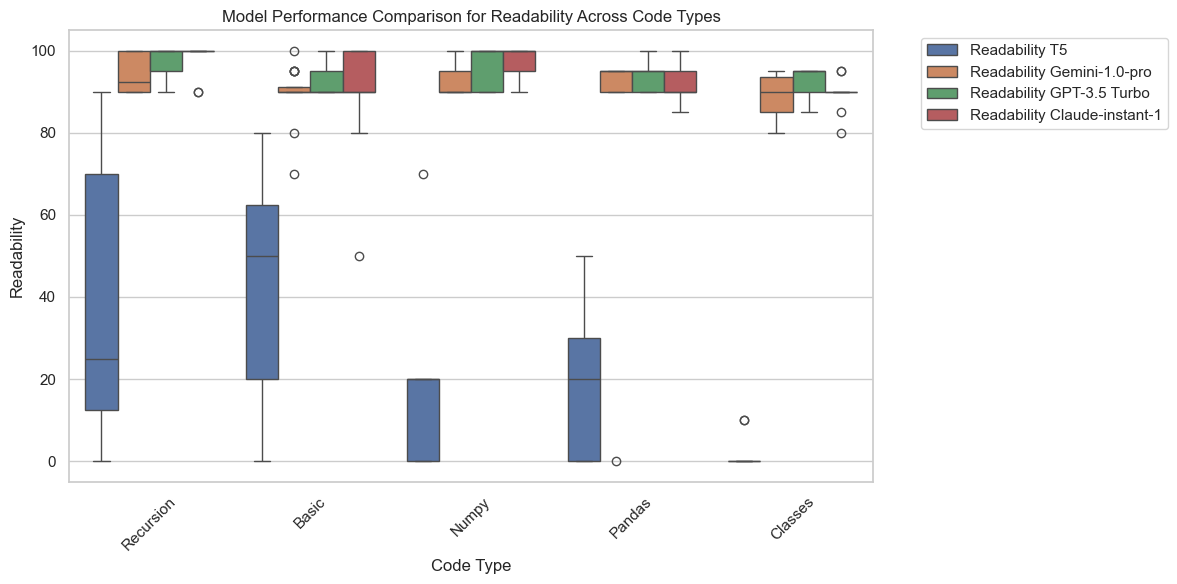

In [132]:
# Load the data
df = pd.read_csv('data_full_docs_gen_eval_metrics_BLEU_ROUGE_GPT4.csv')

# Create a new column specifying the code type for each row
code_types = ['Recursion'] * 10 + ['Basic'] * 20 + ['Numpy'] * 5 + ['Pandas'] * 5 + ['Classes'] * 10
df['Code Type'] = code_types

# Set the style of the visualization
sns.set(style="whitegrid")

# Define evaluation metrics
evaluation_metrics = ['ROUGE-1 f-score', 'ROUGE-2 f-score', 'ROUGE-L f-score', 'BLEU score', 'Accuracy', 'Completeness', 'Relevance', 'Understandability', 'Readability']

# Plot box plots for each evaluation metric across all models for each code type
for metric in evaluation_metrics:
    melted_data = pd.melt(df, id_vars=['Code Type'], value_vars=[f'{metric} {model}' for model in ['T5', 'Gemini-1.0-pro', 'GPT-3.5 Turbo', 'Claude-instant-1']], var_name='Model', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Code Type', y='Score', hue='Model', data=melted_data)
    plt.title(f'Model Performance Comparison for {metric} Across Code Types')
    plt.xlabel('Code Type')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


**BLEU & ROUGE scores**

Similarly to the overall comparison, the T5 scores are much lower, and the Gemini scores in most cases are slightly higher the the GPT's scores and after it is the claude model again.

In terms of the code types themselves, the 3 stronger models acheived the highest scores in the classes docstring generation, after it in the recursion and basic functions, and the lowest scored were in the case of the Numpy and Pandas functions.

**GPT4 evaluation metrics**

This evaluation method didn't show significant differences in performance between the different code types.

As mentioned before, the GPT4 evaluation metrics are close to 100 in some cases, as a result the boxplots get squeezed close to the 100 and they are not very informative.
We could have taken the average and compare the code types averages as we did before with the overall performence but in this case there is a different number of observations for each code type: 10 Recursion, 20 Basic, 5 Numpy, 5 Pandas and 10 Classes. different number of observations might distort the results so we decided to stick to the box plots comparison.



---



# **Model formatting check - ruff**

We will use the sum of errors detected by ruff for each model.

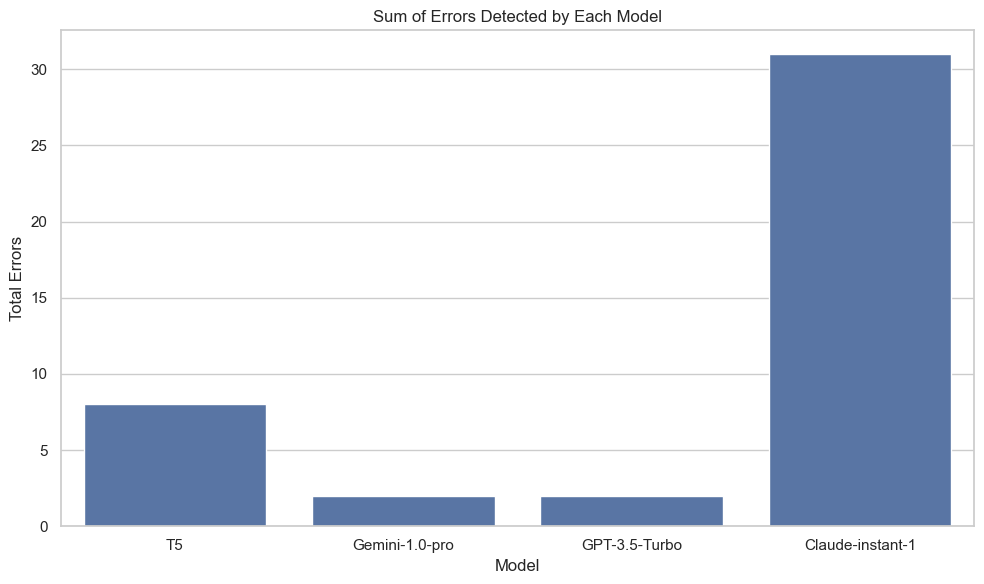

In [133]:
# Summing the errors for each model
error_columns = ['Ruff formatting T5', 'Ruff formatting Gemini-1.0-pro', 'Ruff formatting GPT-3.5-Turbo', 'Ruff formatting Claude-instant-1']
error_sums = results_data[error_columns].sum()

# Prepare data for plotting
error_data = pd.DataFrame({
    'Model': ['T5', 'Gemini-1.0-pro', 'GPT-3.5-Turbo', 'Claude-instant-1'],
    'Errors': error_sums.values
})

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Errors', data=error_data)
plt.title('Sum of Errors Detected by Each Model')
plt.xlabel('Model')
plt.ylabel('Total Errors')
plt.tight_layout()
plt.show()

As shown GPT 3.5 turbo and Gemini almost didn't have formatting errors, while surprisingly Claude had a large amount of errors and T5 had a medium amount.
After investigating the phenomenon we noticed that most of the T5 docstrings where a 1-liner, which is bad in terms of the other evaluation methods but in the case of ruff it does not count as an error. Moreover, Claude had plenty of unnecessary errors such as using spaces after colon, which considered as an error.


---



# **Unit Tests**

The unit tests results are the fail rates of each model for each one of the 50 code snippets.

We will start with basic statistics of the fail rates.

In [134]:
# Load the data and extract the specific columns
fail_rates = ['Unit test fail rate T5', 'Unit test fail rate Gemini-1.0-pro', 'Unit test fail rate GPT-3.5-Turbo', 'Unit test fail rate Claude-instant-1']


stats_dict = {}

for fail_rate in fail_rates:
    col_name = f'{fail_rate}'
    stats_dict[col_name] = {
        'mean': results_data[col_name].mean(),
        'median': results_data[col_name].median(),
        'std_dev': results_data[col_name].std()
      }

stats_df = pd.DataFrame(stats_dict).T
stats_df.reset_index(inplace=True)
stats_df.columns = ['Model_fail_rate', 'Mean', 'Median', 'Standard Deviation']
stats_df

,Model_fail_rate,Mean,Median,Standard Deviation
0,Unit test fail rate T5,0.934517,1.000000,0.211196
1,Unit test fail rate Gemini-1.0-pro,0.472625,0.500000,0.379602
2,Unit test fail rate GPT-3.5-Turbo,0.456809,0.422222,0.366518
3,Unit test fail rate Claude-instant-1,0.506046,0.472222,0.380415


Box plots for visualization

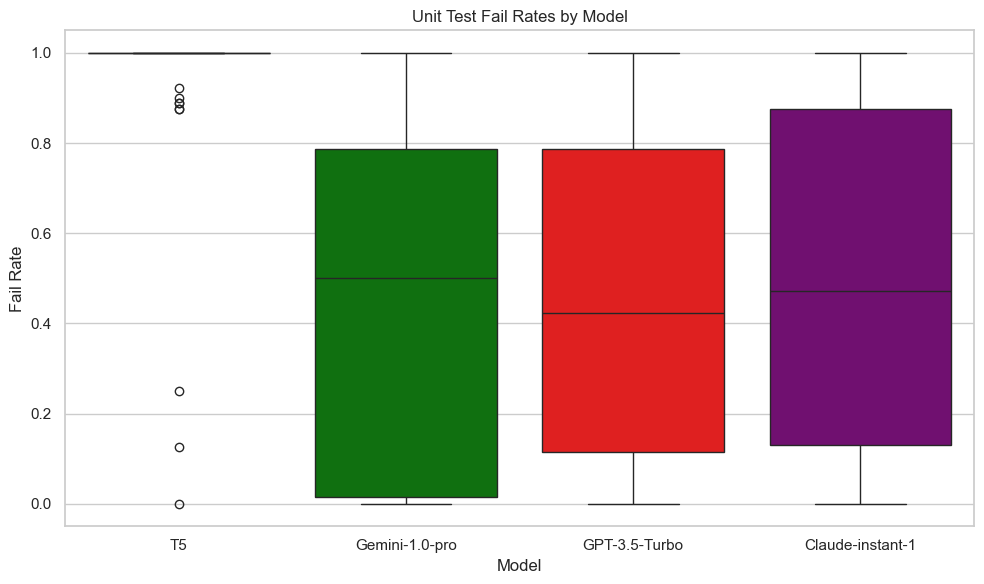

In [135]:
sns.set(style="whitegrid")

models = ['T5', 'Gemini-1.0-pro', 'GPT-3.5-Turbo', 'Claude-instant-1']

melted_fail_rate = pd.melt(results_data, var_name='Model', value_name='Fail Rate', value_vars=fail_rates)

# Rename the models for better readability
model_rename_map = {
    'Unit test fail rate T5': 'T5',
    'Unit test fail rate Gemini-1.0-pro': 'Gemini-1.0-pro',
    'Unit test fail rate GPT-3.5-Turbo': 'GPT-3.5-Turbo',
    'Unit test fail rate Claude-instant-1': 'Claude-instant-1'
}
melted_fail_rate['Model'] = melted_fail_rate['Model'].replace(model_rename_map)

# Define colors for each model
palette = {
    'T5': 'blue',
    'Gemini-1.0-pro': 'green',
    'GPT-3.5-Turbo': 'red',
    'Claude-instant-1': 'purple'
}
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Fail Rate', hue='Model', data=melted_fail_rate, palette=palette)
plt.title('Unit Test Fail Rates by Model')
plt.xlabel('Model')
plt.ylabel('Fail Rate')
plt.tight_layout()
plt.show()



We can see that the fail rates variance is high in the 3 stronger models, while for T5 it's very low with most observations having the maximum fail rate which is 1.

The median values (and also the mean values from the basic statistics section) of the fail rates indicate that GPT 3.5 Turbo had the best prformance overall, followed by Claude and Gemini respectively by a slight margin.

## Unit test fail rate by code types 

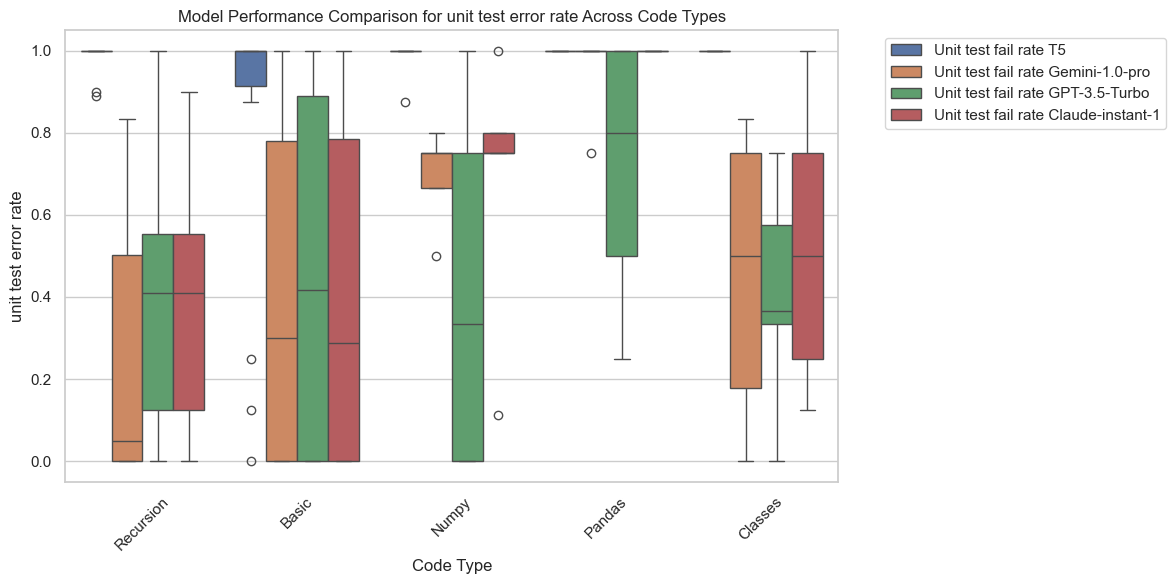

In [136]:
# Create a new column specifying the code type for each row
code_types = ['Recursion'] * 10 + ['Basic'] * 20 + ['Numpy'] * 5 + ['Pandas'] * 5 + ['Classes'] * 10
results_data['Code Type'] = code_types

# Set the style of the visualization
sns.set(style="whitegrid")

# Define evaluation metrics
evaluation_metrics = ['unit test error rate']

# Plot box plots for each evaluation metric across all models for each code type
for metric in evaluation_metrics:
    melted_data = pd.melt(results_data, id_vars=['Code Type'], value_vars=[f'Unit test fail rate {model}' for model in models], var_name='Model', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Code Type', y='Score', hue='Model', data=melted_data)
    plt.title(f'Model Performance Comparison for {metric} Across Code Types')
    plt.xlabel('Code Type')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


As we can see, each model had performed better in different code types, but we can still see that GPT-3.5-Turbo and Gemini-1-pro have performed better than Claude-instant-1 in most cases.

# **Composite evaluation**
As a final comparison, we propose a composite metric to evaluate the overall performance of each model based on the following concepts:
* Calculate a weighted mean value for all comparative metrics (ROUGE and BLEU) since they assess the data in a similar manner.
* Compute a weighted mean for the five scores obtained using GPT-4 prompts to evaluate the quality of the docstrings. Less weight is given to readability, as it is less crucial to the functionality of the docstring and is partially assessed by the ruff formatting check.
* Calculate a weighted mean of the two aforementioned scores, assigning more weight to the GPT-4-based docstring quality checks. This is because GPT-4 is a more advanced tool with specific definitions for each metric suiting our cause. However, we included both methods to account for potential flaws in LLM-generated metrics.
* Subsequently, adjust the score based on the metric created in the previous step by applying a penalty for the unit test error rate.
* Finally, further reduce the score by a small factor for each ruff formatting error detected, as this metric has the least impact on the functionality of the docstring.



In [137]:
import pandas as pd

columns_per_model = {
    'T5': ['ROUGE-1 f-score T5', 'ROUGE-2 f-score T5', 'ROUGE-L f-score T5', 'BLEU score T5', 
           'Accuracy T5', 'Completeness T5', 'Relevance T5', 'Understandability T5', 
           'Readability T5', 'Ruff formatting T5', 'Unit test fail rate T5'],
    'Gemini-1.0-pro': ['ROUGE-1 f-score Gemini-1.0-pro', 'ROUGE-2 f-score Gemini-1.0-pro', 
               'ROUGE-L f-score Gemini-1.0-pro', 'BLEU score Gemini-1.0-pro', 'Accuracy Gemini-1.0-pro', 
               'Completeness Gemini-1.0-pro', 'Relevance Gemini-1.0-pro', 'Understandability Gemini-1.0-pro', 
               'Readability Gemini-1.0-pro', 'Ruff formatting Gemini-1.0-pro', 'Unit test fail rate Gemini-1.0-pro'],
    'GPT-3.5-Turbo': ['ROUGE-1 f-score GPT-3.5-Turbo', 'ROUGE-2 f-score GPT-3.5-Turbo', 'ROUGE-L f-score GPT-3.5-Turbo', 
            'BLEU score GPT-3.5-Turbo', 'Accuracy GPT-3.5-Turbo', 'Completeness GPT-3.5-Turbo', 
            'Relevance GPT-3.5-Turbo', 'Understandability GPT-3.5-Turbo', 'Readability GPT-3.5-Turbo', 
            'Ruff formatting GPT-3.5-Turbo', 'Unit test fail rate GPT-3.5-Turbo'],
    'Claude-instant-1': ['ROUGE-1 f-score Claude-instant-1', 'ROUGE-2 f-score Claude-instant-1', 
               'ROUGE-L f-score Claude-instant-1', 'BLEU score Claude-instant-1', 'Accuracy Claude-instant-1', 
               'Completeness Claude-instant-1', 'Relevance Claude-instant-1', 'Understandability Claude-instant-1', 
               'Readability Claude-instant-1', 'Ruff formatting Claude-instant-1', 'Unit test fail rate Claude-instant-1']
}

# Function to calculate the composite metric for a model
def calculate_composite_metric(row, columns):
    # Extract relevant columns
    comperative_metrics = [row[col] for col in columns[:4]]
    comperative_weights = [0.1, 0.1, 0.3, 0.5]
    gpt4_quality_metrics = [row[col] / 100 for col in columns[4:9]]
    gpt4_weights = [0.225, 0.225, 0.225, 0.225, 0.1]
    ruff_formatting = row[columns[9]]
    unit_test_fail_rate = row[columns[10]]
    
    # Calculate weighted mean for the first 4 metrics
    weighted_mean_comperative = sum(w * m for w, m in zip(comperative_weights, comperative_metrics))
    
    # Calculate weighted mean for the next 5 metrics
    weighted_mean_gpt4 = sum(w * m for w, m in zip(gpt4_weights, gpt4_quality_metrics))
    
    weighted_combined_mean = 0.3 * weighted_mean_comperative + 0.7 * weighted_mean_gpt4
    # Combine all parts
    composite_metric = 0.5 * weighted_combined_mean * (2 - unit_test_fail_rate)
    composite_metric *= 5/(5 + ruff_formatting)
    
    return composite_metric

# Apply the composite metric calculation to each row and each model
for model, columns in columns_per_model.items():
    results_data[f'Composite metric {model}'] = results_data.apply(lambda row: calculate_composite_metric(row, columns), axis=1)

# Print the dataframe with the new composite metrics
(results_data.head())


,Unnamed: 0,Function,Golden Docstring,Unit Tests,T5,Gemini-1.0-pro,GPT-3.5-Turbo,Claude-instant-1,ROUGE-1 f-score T5,ROUGE-2 f-score T5,...,Ruff formatting Claude-instant-1,Unit test fail rate T5,Unit test fail rate Gemini-1.0-pro,Unit test fail rate GPT-3.5-Turbo,Unit test fail rate Claude-instant-1,Code Type,Composite metric T5,Composite metric Gemini-1.0-pro,Composite metric GPT-3.5-Turbo,Composite metric Claude-instant-1
0,Recursion,def sum_even(lst): \r\n total = 0\r\n fo...,Recursively compute the sum of all the element...,"print(sum_even([1, [2, 3, [4, 5]]]) == 7) \np...",Return the sum of the items that are delimited...,Computes the sum of all even-indexed elements ...,\n Recursively calculate the sum of even el...,Iteratively sum the values in a list if they ...,0.235294,0.081633,...,0,1.000000,0.833333,0.500000,0.500000,Recursion,0.059685,0.492583,0.530127,0.565236
1,NaN,"def find_num_changes(n, lst): \n if n == 0:...",Recursively compute the number of ways to repr...,"print(find_num_changes(4, [1, 2, 3]) == 4)\npr...",Find the number of changes,Recursively compute the number of possible way...,\nFind the number of ways to represent a given...,"""""""Find all possible ways to make change for ...",0.101695,0.070175,...,0,1.000000,0.000000,0.200000,0.200000,Recursion,0.081797,0.752320,0.579881,0.639349
2,NaN,def sum_nested(lst): \n if len(lst) == 0:\n...,Recursively compute the absolute sum of all th...,"print(sum_nested([1, 2, [3, 4], [5, [6, 7], 8]...",Return the sum for nested structures .,"Recursively compute the sum of a nested list, ...",\n Recursively calculates the sum of elemen...,"""""""Iteratively compute the absolute sum of ne...",0.222222,0.000000,...,0,0.888889,0.666667,0.444444,0.444444,Recursion,0.153381,0.439626,0.572078,0.593643
3,NaN,"def str_decomp(target, word_bank): \n if ta...",Recursively compute the number of ways to deco...,"print(str_decomp(""abcdef"", [""ab"", ""abc"", ""cd"",...",Gets the total number of words in a string .,Compute the number of ways to decompose a targ...,\n Recursively decomposes a target string b...,"""""""Iteratively decompose a target string into...",0.230769,0.080000,...,1,1.000000,0.000000,0.000000,0.000000,Recursion,0.095202,0.781538,0.735488,0.625384
4,NaN,"def n_choose_k(n, k): \n if k < 0 or k > n:...",Compute the number of options to choose k samp...,"print(n_choose_k(8, 8) == 1)\r\nprint(n_choose...",Return the number of k - columns and k - > val...,Computes the binomial coefficient of n and k.\...,\nCalculate the number of ways to choose k ele...,Compute nCk (binomial coefficient) - the numb...,0.280000,0.125000,...,1,1.000000,0.000000,0.375000,0.375000,Recursion,0.053836,0.769936,0.592473,0.518785


In [138]:
composite_metrics = [f'Composite metric {model}' for model in models]
composite_table = results_data[composite_metrics]


composite_dict = {}

for metric in composite_table:
    col_name = f'{metric}'
    composite_dict[col_name] = {
        'mean': composite_table[col_name].mean(),
        'median': composite_table[col_name].median(),
        'std_dev': composite_table[col_name].std()
      }

composite_metric_df = pd.DataFrame(composite_dict).T
composite_metric_df.reset_index(inplace=True)
composite_metric_df.columns = ['Model_composite_metric', 'Mean', 'Median', 'Standard Deviation']
composite_metric_df

,Model_composite_metric,Mean,Median,Standard Deviation
0,Composite metric T5,0.073402,0.044118,0.084155
1,Composite metric Gemini-1.0-pro,0.548962,0.540497,0.183965
2,Composite metric GPT-3.5-Turbo,0.569641,0.580142,0.149863
3,Composite metric Claude-instant-1,0.474809,0.494853,0.158410


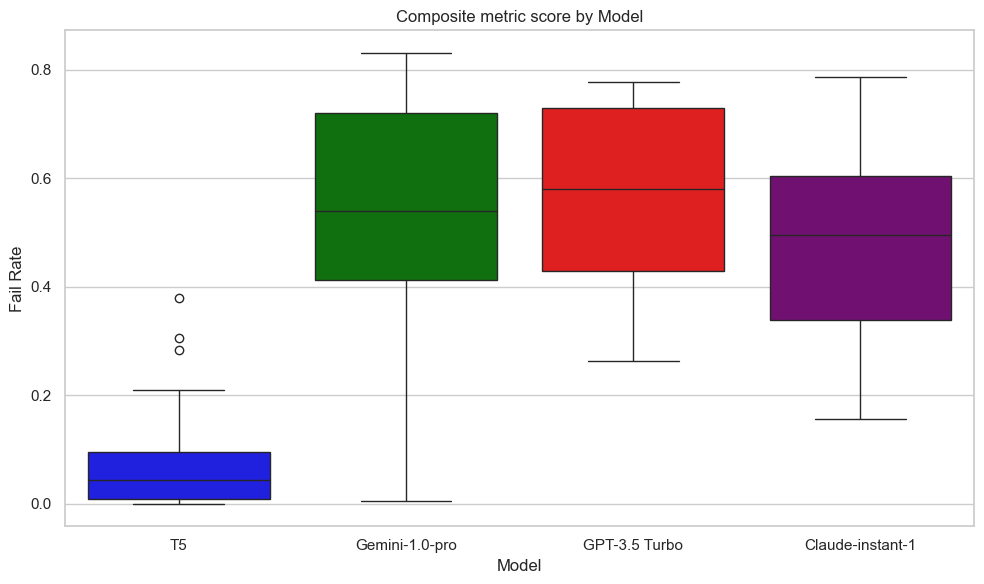

In [139]:
sns.set(style="whitegrid")

melted_composite = pd.melt(composite_table, var_name='Model', value_name='Composite score')

# Rename the models for better readability
model_rename_map = {
    'Composite metric T5': 'T5',
    'Composite metric Gemini-1.0-pro': 'Gemini-1.0-pro',
    'Composite metric GPT-3.5-Turbo': 'GPT-3.5 Turbo',
    'Composite metric Claude-instant-1': 'Claude-instant-1'
}
melted_composite['Model'] = melted_composite['Model'].replace(model_rename_map)

# Define colors for each model
palette = {
    'T5': 'blue',
    'Gemini-1.0-pro': 'green',
    'GPT-3.5 Turbo': 'red',
    'Claude-instant-1': 'purple'
}

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Composite score', hue='Model', data=melted_composite, palette=palette)
plt.title('Composite metric score by Model')
plt.xlabel('Model')
plt.ylabel('Fail Rate')
plt.tight_layout()
plt.show()

## Composite score by code types

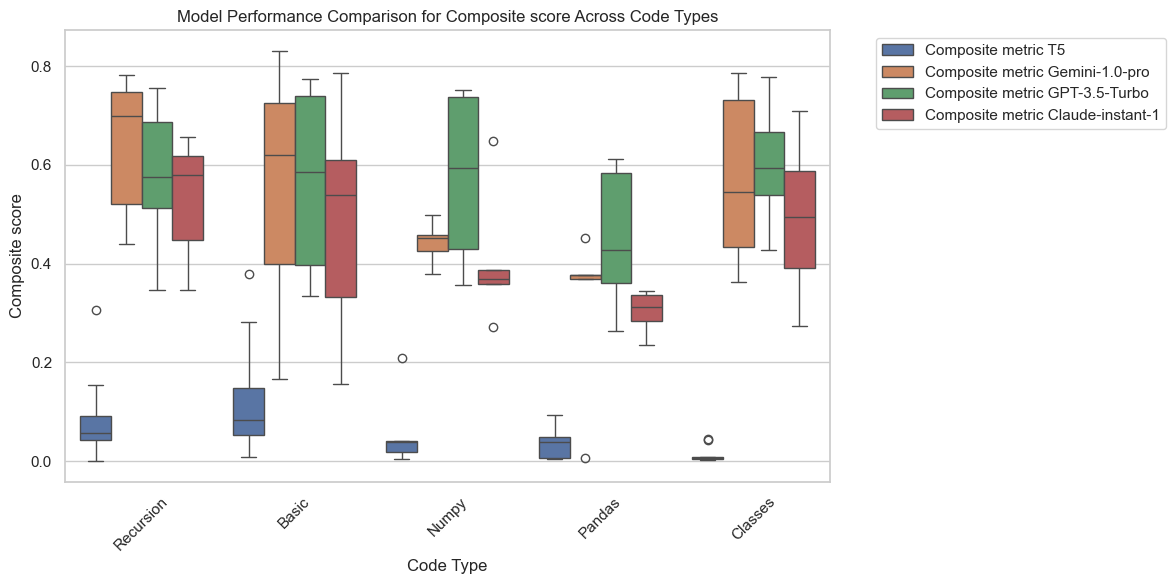

In [140]:
sns.set(style="whitegrid")

# Define evaluation metrics
evaluation_metrics = ['Composite score']

# Plot box plots for each evaluation metric across all models for each code type
for metric in evaluation_metrics:
    melted_data = pd.melt(results_data, id_vars=['Code Type'], value_vars=[f'Composite metric {model}' for model in models], var_name='Model', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Code Type', y='Score', hue='Model', data=melted_data)
    plt.title(f'Model Performance Comparison for {metric} Across Code Types')
    plt.xlabel('Code Type')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


GPT-3.5-Turbo seems to be the overall better performer accross all code types, though we can see specific strengths of other models (such as Gemini-1.0-pro in recursion).

In [141]:
results_data.to_csv("docalchemy final scores.csv", index=False)